<a href="https://colab.research.google.com/github/Pulvii/TallerDeSoporteInf-Pulvirenti-Fumo/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

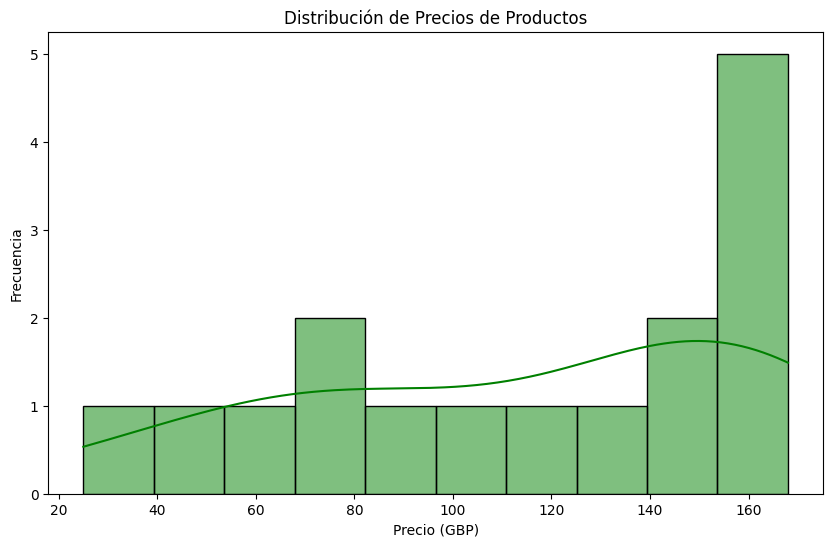

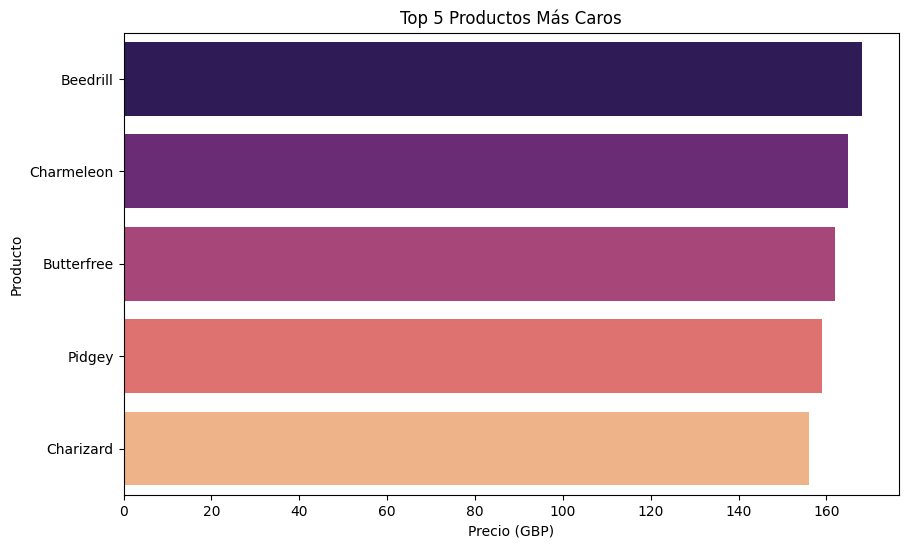

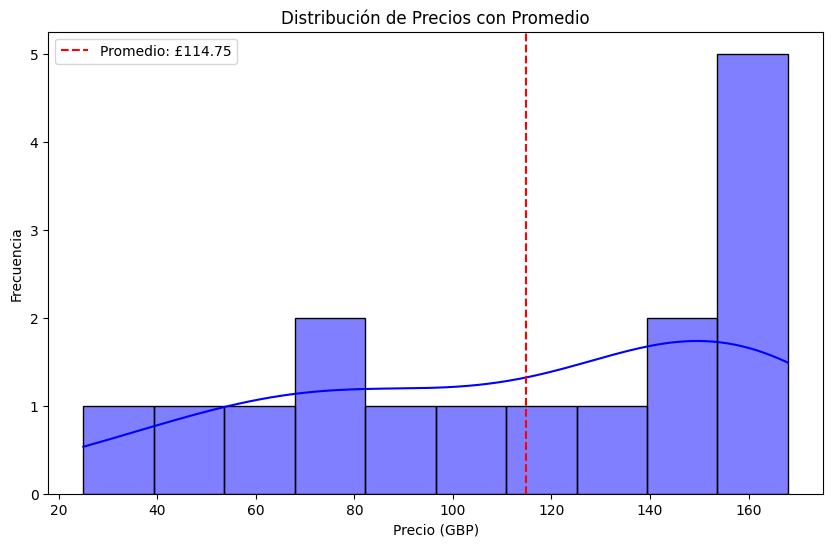

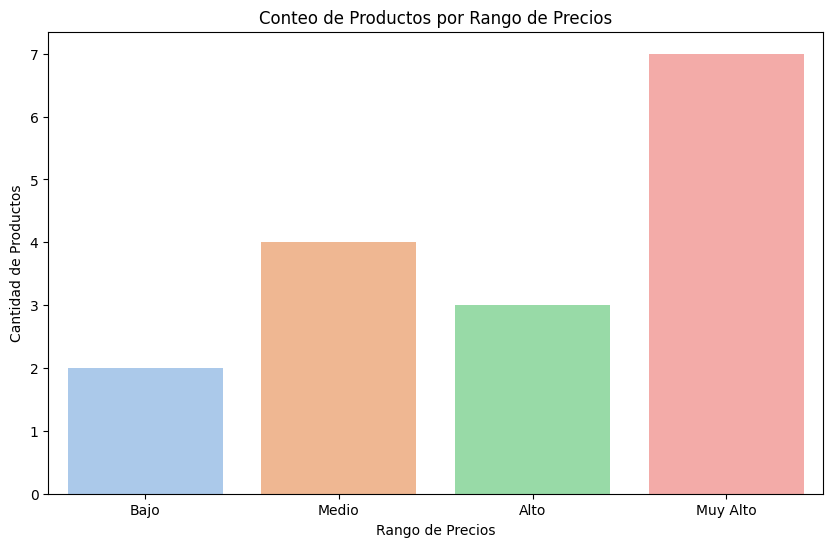


Archivo limpio guardado como 'productos_scrapeme_limpio.csv'.


In [10]:
# Instalar librerías necesarias
!pip install beautifulsoup4 requests

# Importar librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL de la página
url = "https://scrapeme.live/shop/"

# Hacer la solicitud HTTP
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extraer información de productos
products = soup.find_all('li', class_='product')

# Crear listas para almacenar los datos
product_names = []
product_prices = []
product_links = []

for product in products:
    # Nombre del producto
    name = product.find('h2').text
    product_names.append(name)

    # Precio del producto
    price = product.find('span', class_='woocommerce-Price-amount').text
    price = price.replace('£', '').replace(',', '')  # Limpiar el precio
    product_prices.append(float(price))

    # Enlace al producto
    link = product.find('a')['href']
    product_links.append(link)

# Crear un DataFrame con los datos
data = pd.DataFrame({
    'Producto': product_names,
    'Precio (GBP)': product_prices,
    'Link': product_links
})

# Guardar los datos en un archivo CSV
data.to_csv('productos_scrapeme.csv', index=False)

# **Análisis de datos y visualización**

# Gráfico 1: Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(data['Precio (GBP)'], bins=10, kde=True, color='green')
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio (GBP)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico 2: Top 5 productos más caros
top_5_expensive = data.sort_values(by='Precio (GBP)', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_expensive, x='Precio (GBP)', y='Producto', hue='Producto', dodge=False, palette='magma', legend=False)
plt.title('Top 5 Productos Más Caros')
plt.xlabel('Precio (GBP)')
plt.ylabel('Producto')
plt.show()

# Gráfico 3: Precio promedio
mean_price = data['Precio (GBP)'].mean()

# Visualización del precio promedio como línea en el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['Precio (GBP)'], bins=10, kde=True, color='blue')
plt.axvline(mean_price, color='red', linestyle='--', label=f'Promedio: £{mean_price:.2f}')
plt.title('Distribución de Precios con Promedio')
plt.xlabel('Precio (GBP)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Gráfico 4: Conteo de productos por rango de precios
data['Rango de Precios'] = pd.cut(data['Precio (GBP)'], bins=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Rango de Precios', hue='Rango de Precios', palette='pastel', dodge=False, legend=False)
plt.title('Conteo de Productos por Rango de Precios')
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad de Productos')
plt.show()

# Guardar el DataFrame limpio como CSV final
data.to_csv('productos_scrapeme_limpio.csv', index=False)
print("\nArchivo limpio guardado como 'productos_scrapeme_limpio.csv'.")


**Distribución de Precios**

La distribución de precios revela que la mayoría de los productos se encuentran en el rango medio-alto (entre 140 y 170 GBP), lo que sugiere que la tienda tiene una oferta predominantemente enfocada en artículos de mayor valor. Sin embargo, también hay productos en rangos de precios más bajos, aunque en menor cantidad.

El precio promedio de los productos es 114.75 GBP, lo cual nos da una referencia clara del punto central en la oferta de productos.